## Import Necessary Libraries

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()


## Find Datasets

In [2]:
tfds.list_builders()

2024-08-28 23:23:27.679822: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech10

### Get information on the Data

In [3]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/Users/shrutishreya/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-data

### Prepare Data

In [4]:
ds_train = tfds.load(name='rock_paper_scissors',split='train')
ds_test = tfds.load(name='rock_paper_scissors',split='test')

### Show Examples

2024-08-28 23:23:46.049388: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-28 23:23:46.079803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


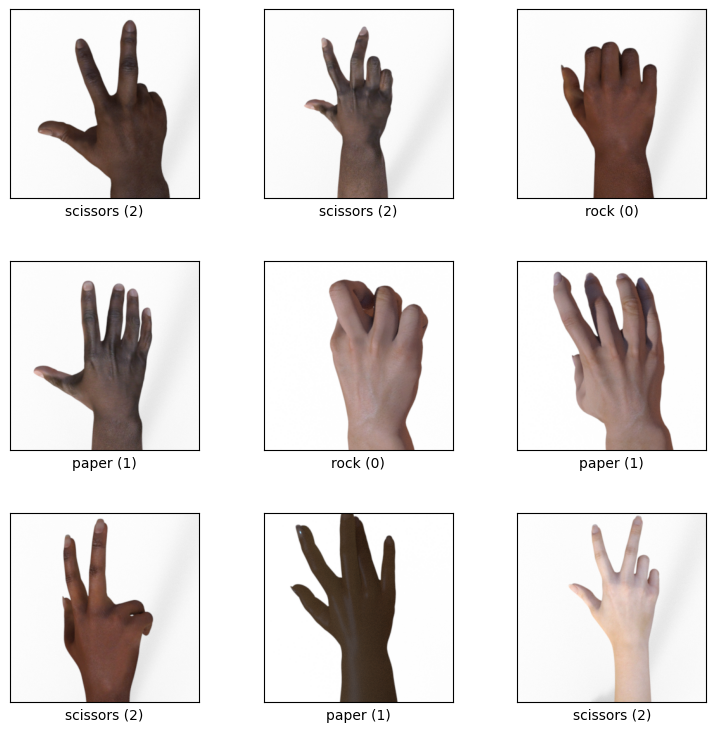

In [5]:
fig = tfds.show_examples(ds_train, info)

### Additional Data Preparation

In [6]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train]) 

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test]) 

2024-08-28 23:24:07.970888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-28 23:24:11.076492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-28 23:24:12.109778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-28 23:24:12.885439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
train_images = train_images.reshape(2520,300,300,1)
test_image = test_images.reshape(372,300,300,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [8]:
train_images.dtype

dtype('float32')

## Train the network (basic approach)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 703ms/step - accuracy: 0.3711 - loss: 49.3534
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 104s 994ms/step - accuracy: 0.6423 - loss: 1.5127
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6325 - loss: 2.8932
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 940ms/step - accuracy: 0.7838 - loss: 0.6159
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 77s 981ms/step - accuracy: 0.8183 - loss: 0.4999


In [10]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.5070 - loss: 2.0083


[2.122382879257202, 0.4784946143627167]

### Train the network (convolutional approach)

In [14]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5394 - loss: 1.1437
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9724 - loss: 0.1118
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9959 - loss: 0.0207
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9978 - loss: 0.0109
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 1.0000 - loss: 0.0039


In [6]:
pip update tensorflow

ERROR: unknown command "update"
Note: you may need to restart the kernel to use updated packages.
